This is to test the entropy calculation for different distributions. 

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

Entropy of the uniform distribution: 4.898740645980476


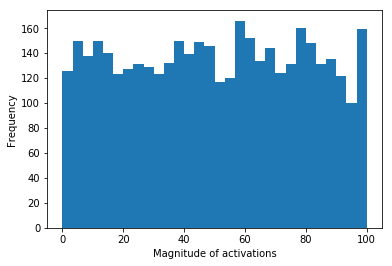

In [2]:
number_of_samples = 4096
uniform = np.random.uniform(0, 100, (number_of_samples,))
uniform_hist, _, _ = plt.hist(uniform, bins=30)
entropy_uniform_dist = stats.entropy(uniform_hist, base=2)
print(f'Entropy of the uniform distribution: {entropy_uniform_dist}')
plt.xlabel("Magnitude of activations")
plt.ylabel("Frequency")
plt.show()

In [3]:
def _set_percentage_to_zero(distribution, percentage):
    
    distribution = np.copy(distribution) 
    
    number_of_samples = distribution.shape[0]
    proportion = percentage / 100.0
    number_samples_to_zero = int(np.floor(number_of_samples * proportion))
    
    distribution[0:number_samples_to_zero] = 0
    
    return distribution

Entropy of the relu like distribution: 3.351084134633326


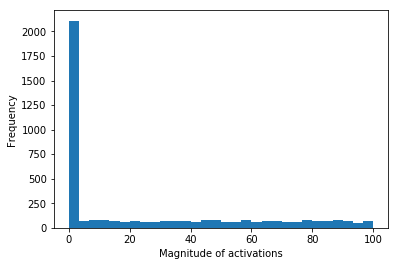

In [4]:
# take a percentage of previously sampled points
relu_like_dist =_set_percentage_to_zero(uniform, 50)

relu_like_hist, _, _ = plt.hist(relu_like_dist, bins=30)
entropy_relu_like_dist = stats.entropy(relu_like_hist, base=2)
print(f'Entropy of the relu like distribution: {entropy_relu_like_dist}')
plt.xlabel("Magnitude of activations")
plt.ylabel("Frequency")
plt.show()

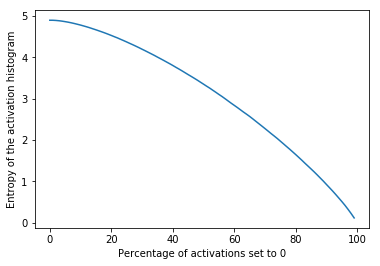

In [5]:
entropies = []
for percentage in np.arange(0, 100, 1):
    relu_like = _set_percentage_to_zero(uniform, percentage)
    relu_like_hist, _ = np.histogram(relu_like, bins=30)
    entropy_relu_like_dist = stats.entropy(relu_like_hist, base=2)
    entropies.append(entropy_relu_like_dist)

plt.figure()
plt.plot(entropies)
plt.xlabel("Percentage of activations set to 0")
plt.ylabel("Entropy of the activation histogram")
plt.show()

In [6]:
def _copy_neighbour(to_transform, iterations):
    to_transform = np.copy(to_transform)
    to_transform_mass = np.sum(to_transform)

    #shuffle nad replace all nonzero values to simulate more compact representation
    nonzeros = to_transform[to_transform != 0]
    zeros = np.zeros((to_transform.shape[0] - nonzeros.shape[0]))

    for iteration in range(iterations):
        nonzeros[1::2] = nonzeros[0:-1:2]
        np.random.shuffle(nonzeros)

    transformed = np.concatenate((nonzeros, zeros))
    return transformed

Entropy of the transformed distribution: 2.7658018261687585


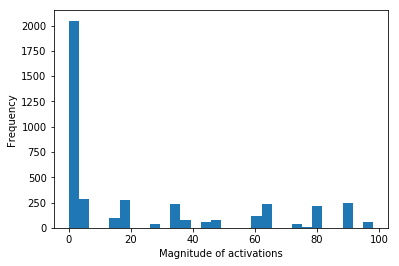

In [7]:
# now impose structure on the 1st till 30th bin
transformed = _copy_neighbour(relu_like_dist, 200) 

transformed_hist, _, _ = plt.hist(transformed, bins=30)
entropy_transformed_dist = stats.entropy(transformed_hist, base=2)
print(f'Entropy of the transformed distribution: {entropy_transformed_dist}')
plt.xlabel("Magnitude of activations")
plt.ylabel("Frequency")
plt.show()

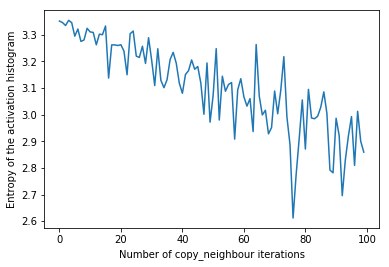

In [8]:
entropies = []
for iterations in np.arange(0, 100, 1):
    dist = _copy_neighbour(relu_like_dist, iterations)
    hist, _ = np.histogram(dist, bins=30)
    entropy_dist = stats.entropy(hist, base=2)
    entropies.append(entropy_dist)

plt.figure()
plt.plot(entropies)
plt.xlabel("Number of copy_neighbour iterations")
plt.ylabel("Entropy of the activation histogram")
plt.show()